Final columns in DataFrame: ['timestamp', 'cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'battery_level', 'cpu_power']


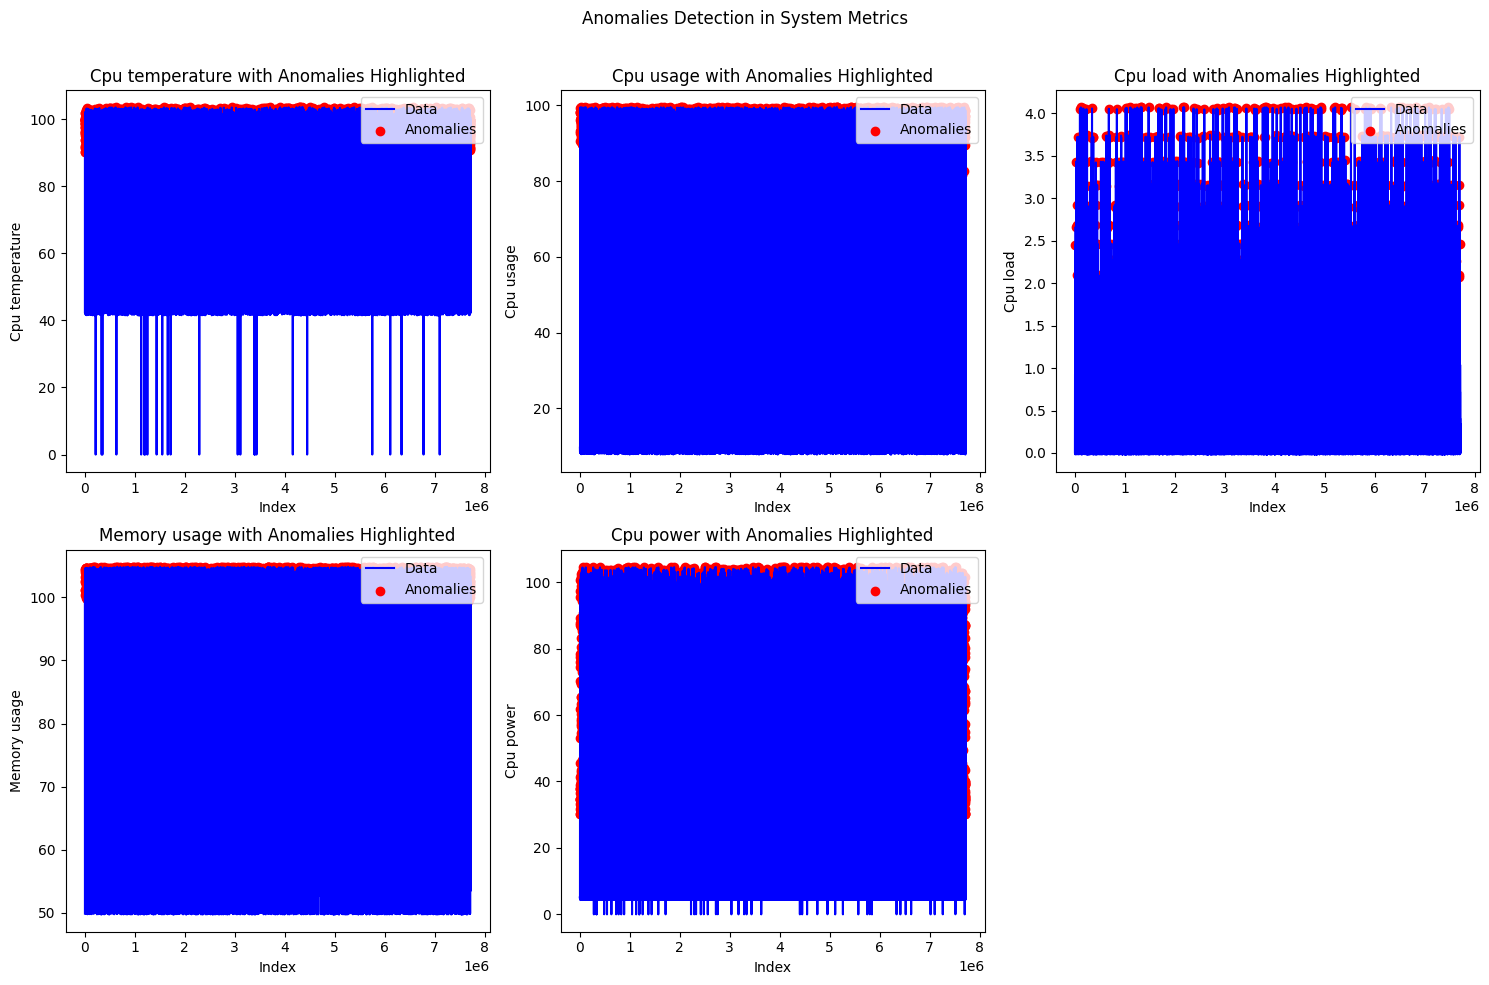

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

dtype_dict = {
    'timestamp': str,
    'cpu_temperature': float,
    'cpu_usage': float,
    'cpu_load': float,
    'memory_usage': float,
    'battery_level': float,
    'cpu_power': float
}

df = pd.read_csv('/content/augmented_data.csv', header=None, dtype=dtype_dict, low_memory=False)



# Assign the correct column names
expected_columns = ['timestamp', 'cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'battery_level', 'cpu_power']
if df.shape[1] == len(expected_columns):
    df.columns = expected_columns
else:
    raise ValueError(f"Unexpected column count. Expected {len(expected_columns)}, but got {df.shape[1]}.")

# Display column names for verification
print("Final columns in DataFrame:", df.columns.tolist())

# Convert columns to numeric, ensuring that errors are coerced to NaN
for column in ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Define columns for analysis
metrics = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']

# Thresholds for anomalies
thresholds = {
    'cpu_temperature': 90,
    'cpu_usage': 80,
    'cpu_load': 2.0,
    'memory_usage': 85,
    'cpu_power': 30
}

# Downsampling the dataset for better performance in plotting (take every nth value)
downsample_factor = 100  # Adjust this value depending on your dataset size
df_downsampled = df.iloc[::downsample_factor]

# Create subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    ax = axes[idx]

    # Plot the downsampled metric data
    ax.plot(df_downsampled.index, df_downsampled[metric], label='Data', color='blue')

    # Identify anomalies
    anomalies = df_downsampled[df_downsampled[metric] > thresholds[metric]]

    # Plot anomalies as red dots
    ax.scatter(anomalies.index, anomalies[metric], color='red', label='Anomalies')

    # Titles and labels
    ax.set_title(f'{metric.replace("_", " ").capitalize()} with Anomalies Highlighted')
    ax.set_xlabel('Index')
    ax.set_ylabel(metric.replace('_', ' ').capitalize())
    ax.legend(loc='upper right')  # Set legend location to avoid slowness

# Remove extra subplot if needed
if len(metrics) < len(axes):
    for j in range(len(metrics), len(axes)):
        fig.delaxes(axes[j])

# Main title and layout adjustments
plt.suptitle('Anomalies Detection in System Metrics')
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()
